In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

## Copulas fundamentals

Copulas allow us to decompose a joint probability distribution into their marginals (which by definition have no correlation) and a function which couples (hence the name) them together and thus allows us to specify the correlation seperately. The copula is that coupling function.

First we're going to need a feel tools to work with copulas. We want to transform any continuous distribution into a uniform distribution and vice-versa.

### From uniform to gaussian

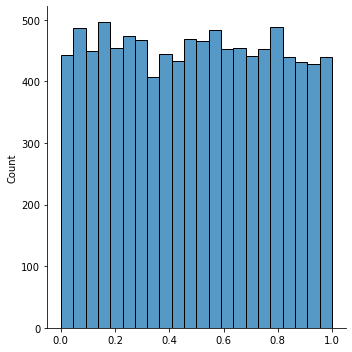

In [2]:
x = stats.uniform(0, 1).rvs(10000)
sns.displot(x, kde=False)

To transform a uniform distribution into a normal distribution, we simply apply the inverse CDF (`ppf`) to the uniform sample.

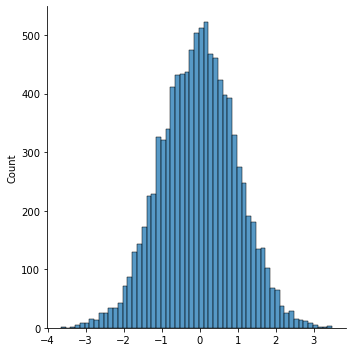

In [3]:
norm = stats.distributions.norm()
x_trans = norm.ppf(x)
sns.displot(x_trans)

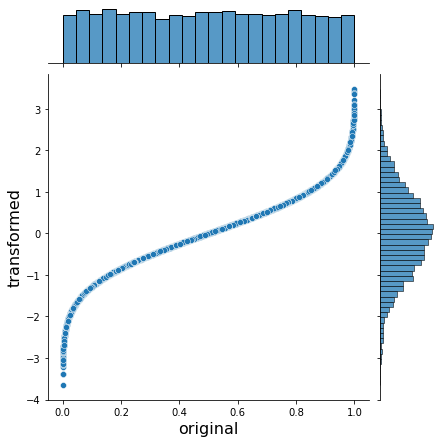

In [4]:
h = sns.jointplot(x=x, y=x_trans)
h.set_axis_labels('original', 'transformed', fontsize=16)

### From gaussian to uniform

To do the opposite, we apply the inverse of the inverse of the CDF, that is, the CDF to the sample and we get back the uniform sample.

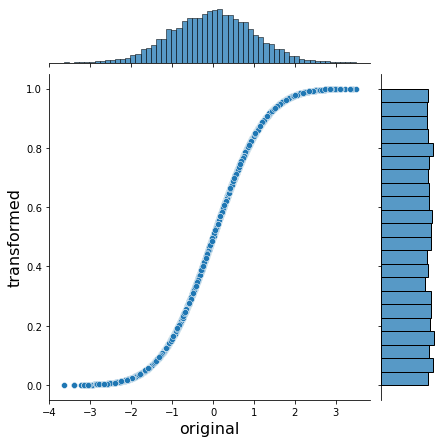

In [5]:
x_trans_trans = norm.cdf(x_trans)
h = sns.jointplot(x=x_trans, y=x_trans_trans)
h.set_axis_labels('original', 'transformed', fontsize=16)

https://en.wikipedia.org/wiki/Probability_integral_transform

In [6]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], [0.5, 1.]])
x = mvnorm.rvs(10000)

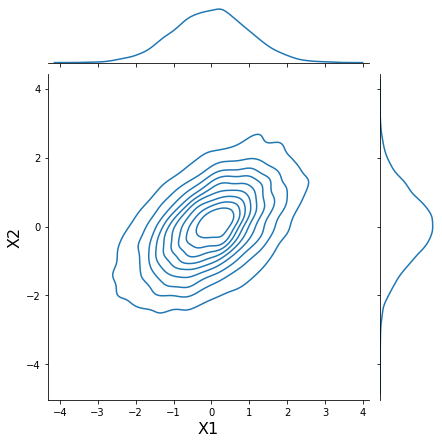

In [7]:
h = sns.jointplot(x=x[:, 0], y=x[:, 1], kind='kde')
h.set_axis_labels('X1', 'X2', fontsize=16)

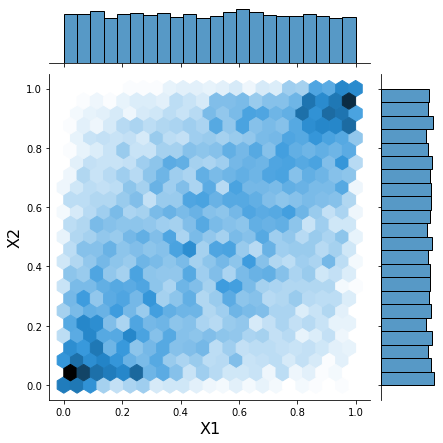

In [8]:
norm = stats.norm()
x_unif = norm.cdf(x)
h = sns.jointplot(x=x_unif[:, 0], y=x_unif[:, 1], kind='hex')
h.set_axis_labels('X1', 'X2', fontsize=16)

In [9]:
# x1 = stats.uniform(0, 1).rvs(10000)
# x2 = stats.uniform(0, 1).rvs(10000)
# h = sns.jointplot(x=x1, y=x2, kind='hex')
# h.set_axis_labels('X1', 'X2', fontsize=16)

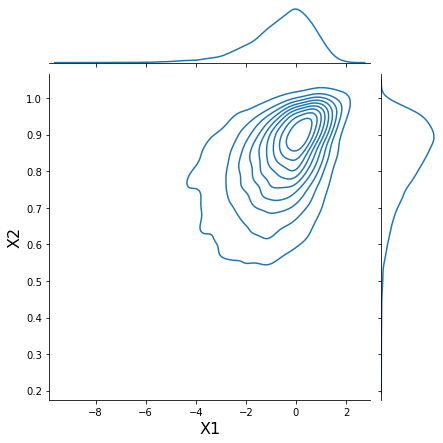

In [10]:
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

h = sns.jointplot(x=x1_trans, y=x2_trans, kind='kde')
h.set_axis_labels('X1', 'X2', fontsize=16)

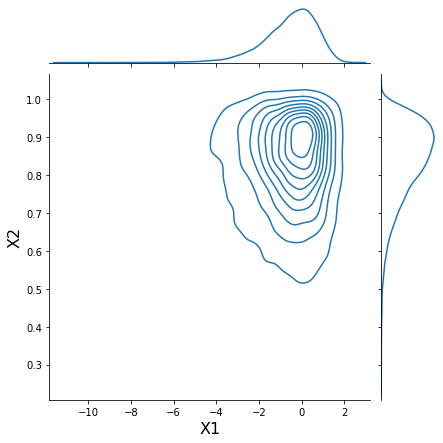

In [11]:
x1 = m1.rvs(10000)
x2 = m2.rvs(10000)

h = sns.jointplot(x=x1, y=x2, kind='kde')
h.set_axis_labels('X1', 'X2', fontsize=16)

## Copulas from Empirical CDFs

In [54]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=[[1., 0.9], [0.9, 1.]])
data = mvnorm.rvs(10000)

x = data[:, 0]
y = data[:, 1]

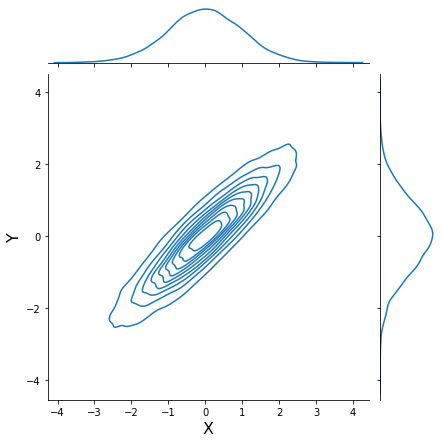

In [55]:
h = sns.jointplot(x=x, y=y, kind='kde')
h.set_axis_labels('X', 'Y', fontsize=16)

In [56]:
x_ecdf = ECDF(x)
y_ecdf = ECDF(y)
x_unif = x_ecdf(x)
y_unif = y_ecdf(y)

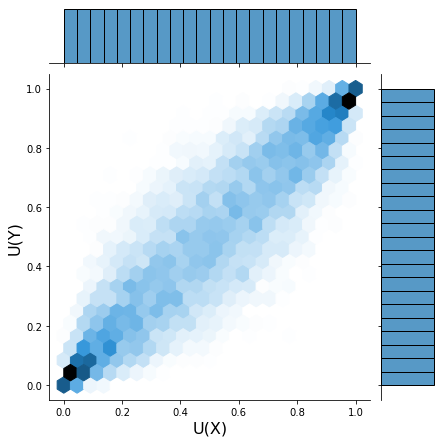

In [57]:
h = sns.jointplot(x=x_unif, y=y_unif, kind='hex')
h.set_axis_labels('U(X)', 'U(Y)', fontsize=16)

In [58]:
print(stats.spearmanr(x, y))
print(stats.spearmanr(x_unif, y_unif))

SpearmanrResult(correlation=0.893484086898841, pvalue=0.0)
SpearmanrResult(correlation=0.893484086898841, pvalue=0.0)


A ideia eh aprender a inversa da cdf utilizando algum modelo?
1. X = f(U(X)) where f = CDF^(-1)
2. x_synthetic = f(u_sampled)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [61]:
x_model = RandomForestRegressor(n_estimators=300, min_samples_leaf=3)
x_model.fit(x_unif.reshape(-1, 1), x)

y_model = RandomForestRegressor(n_estimators=300, min_samples_leaf=3)
y_model.fit(y_unif.reshape(-1, 1), y)

RandomForestRegressor(min_samples_leaf=3, n_estimators=300)

In [74]:
# u_sampled_x = np.random.choice(x_unif, replace=True, size=10000)
# u_sampled_y = np.random.choice(y_unif, replace=True, size=10000)
x_synthetic = x_model.predict(x_unif.reshape(-1, 1))
y_synthetic = y_model.predict(y_unif.reshape(-1, 1))

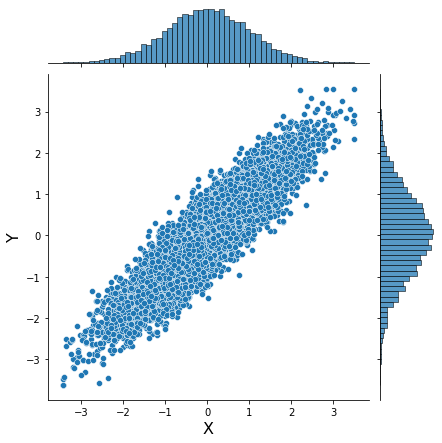

In [75]:
h = sns.jointplot(x=x_synthetic, y=y_synthetic)
h.set_axis_labels('X', 'Y', fontsize=16)

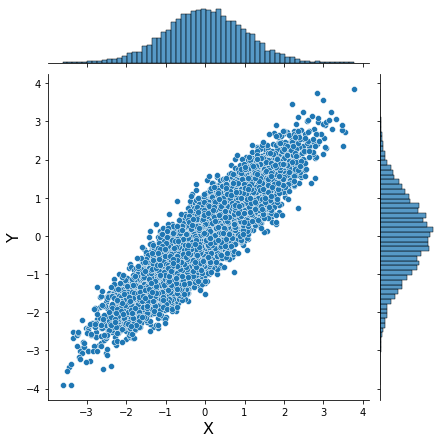

In [67]:
h = sns.jointplot(x=x, y=y)
h.set_axis_labels('X', 'Y', fontsize=16)

## Copulas lib - tutorial

In [12]:
from copulas.datasets import sample_bivariate_age_income
from copulas.multivariate import GaussianMultivariate

In [13]:
df = sample_bivariate_age_income()

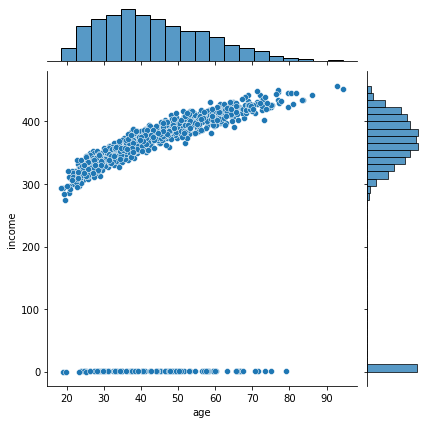

In [14]:
h = sns.jointplot(x=df['age'], y=df['income'])

In [15]:
copula = GaussianMultivariate()
copula.fit(df)

/home/felipegiori/anaconda3/envs/ds/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5350: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/felipegiori/anaconda3/envs/ds/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/felipegiori/anaconda3/envs/ds/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:647: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


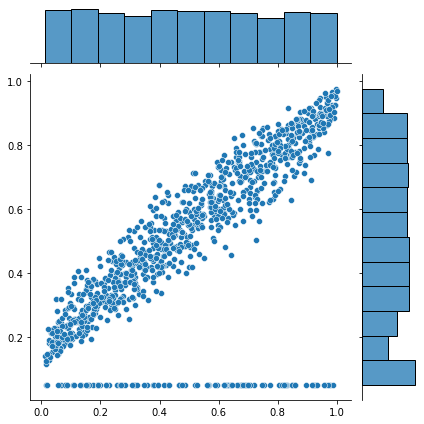

In [16]:
age_cdf = copula.univariates[0].cdf(df['age'])
inc_cdf = copula.univariates[1].cdf(df['income'])

h = sns.jointplot(x=age_cdf, y=inc_cdf)

In [17]:
synthetic = copula.sample(len(df))

In [18]:
synthetic.head()

,age,income
0,37.157570,353.620205
1,28.109897,255.176790
2,25.964225,268.987951
3,36.278581,389.306065
4,18.540694,254.629041


In [2]:
from causalgraphicalmodels import StructuralCausalModel

In [99]:
def mu():
    return np.random.uniform() * 10

def sd():
    return np.random.uniform() * 2

_mu = 0
_sd = 1
linear_uniform = StructuralCausalModel({
    "X": lambda n_samples: np.random.normal(_mu, _sd, size=(n_samples, )),
    "Y": lambda X, n_samples: 3 * X + np.random.uniform(-3, 3, size=(n_samples, ))
})

sin_uniform = StructuralCausalModel({
    "Y": lambda n_samples: np.random.normal(_mu, _sd, size=(n_samples, )),
    "X": lambda Y, n_samples: 3 * np.sin(Y) + np.random.uniform(-3, 3, size=(n_samples, ))
})


In [107]:
df = linear_uniform.sample(n_samples=10000)
df = sin_uniform.sample(n_samples=10000)

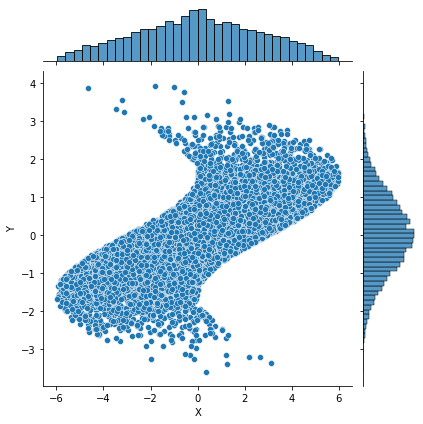

In [108]:
h = sns.jointplot(x=df['X'], y=df['Y'])

Precisamos computar P(X < x, Y < y). Isso dá para fazer de forma empírica. 
1. Ordene os dados por X
2. Pegue todos os maiores do x, conte quantos são: chame de n_x
3. Pegue todos os maiores do que y, dos que já são maiores do que x (ou seja dos n_x anteriores), chame de n_y|x
4. P(X < x, Y < y) = (n_x + n_y|x) / n
5. n é o total de dados

Sabendo do acima, temos uma base de dados X,Y
- Para computar o leakage de X -> Y
- Compute a CDF de X: ecdf_x = ECDF(df.X)
- df_sample = Faça um bootstrap nas linhas dos dados, teremos uns 10k disso
- Para cada amostra do bootstrap df_sample[i]:
    - Compute P(X < x) = ecdf(df_sample[i].X) # com a CDF acima
    - Computar a CDF de Y NO BOOTSTRAP: ecdf_y = ECDF(df_sample[i].Y)

Passo final
- Computa esse limiar aí
- onde: u = ecdf_y(df_sample[i].Y)
- v = ecdf_x(df_sample[i].X)
- min(u, v) - max(u + v - 1, 0)

In [23]:
# Ordena os dados por X
df = df.sort_values('X')

In [32]:
x = 1.5
y = 1

n = df.shape[0]
# n_x = df[df['X'] < x].shape[0]
n_yx = df[(df['X'] < x) & (df['Y'] < y)].shape[0]

p = (n_yx) / n
print(p)

0.6286


In [3]:
databases_ce_pairs = {
    'breast_tumor':[('tumor_size', 'inv_nodes'), ('tumor_size', 'deg_malig')],
    'cholesterol':[('chol', 'trestbps'), ('chol', 'fbs')],
    'pbc':[('stage', 'albumin'), ('stage', 'protime'), ('stage', 'bili')],
    'pollution':[('mort', 'ovr65')],
    'autompg':[('horsepower', 'mpg'), ('weight', 'mpg')],
    'cpu':[('myct', 'erp'), ('mmax', 'erp'), ('cach', 'erp')],
    'breastw':[('target', 'Clump_Thickness'), ('target', 'Cell_Shape_Uniformity'), ('target', 'Cell_Size_Uniformity')],
    'balance_scale':[('left_weight', 'target'), ('right_weight', 'target'), ('left_distance', 'target'), ('right_distance', 'target')],
    'servo':[('pgain', 'class'), ('vgain', 'class')],
    'sensory':[('trellis', 'score')],
    'pwlinear':[(f'a{n}', 'binaryClass') for n in range(1, 11)],
    'wisconsin':[('diagnosis', 'perimeter_mean'), ('diagnosis', 'smoothness_mean'), ('diagnosis', 'concavity_mean')]
}

In [4]:
import sys
sys.path.append("..")
from mestrado.modelling import features
from mestrado import datasets

df = datasets.load_sensory()
df = df[['trellis', 'score']]
df.columns = ['X', 'Y']

In [5]:
ce_pairs = datasets.load_ce_pairs(a_type='Numerical', b_type='Numerical')

In [14]:
diff_means = []
p_value_l = []
target = 1 # 1: causal, -1: anti-causal, 0: independent or confounded

for ce_pair in ce_pairs:
    if len(diff_means) > 200:
        break
    
    if ce_pair.target == target:        
        df = ce_pair.data.copy()
        df.columns = ['X', 'Y']
        
        ecdf_x = ECDF(df['X'])
        ecdf_y = ECDF(df['Y'])
        
        ub_x = []
        lb_x = []
        p_x = []
        
        hist = np.histogram(df['X'], bins='auto')
        hist_dist = stats.rv_histogram(hist)

        for x, y in df.values:
            Fx = ecdf_x(x)
            Fy = ecdf_y(y)
            if Fx < Fy:
                upper_bound = 1
                lower_bound = max((Fx + Fy - 1)/Fx, 0)
            else:
                upper_bound = Fy/Fx 
                lower_bound = max((Fx + Fy - 1)/Fx, 0)
            ub_x.append(upper_bound)
            lb_x.append(lower_bound)
            p_x.append(hist_dist.pdf(x))
            

        ub_y = []
        lb_y = []
        p_y = []
        
        hist = np.histogram(df['Y'], bins='auto')
        hist_dist = stats.rv_histogram(hist)

        for x, y in df.values:
            Fx = ecdf_x(x)
            Fy = ecdf_y(y)
            if Fy < Fx:
                upper_bound = 1
                lower_bound = max((Fx + Fy - 1)/Fy, 0)
            else:
                upper_bound = Fx/Fy 
                lower_bound = max((Fx + Fy - 1)/Fy, 0)
            ub_y.append(upper_bound)
            lb_y.append(lower_bound)
            p_y.append(hist_dist.pdf(y))
            
        ub_x = np.array(ub_x)
        lb_x = np.array(lb_x)
        ub_y = np.array(ub_y)
        lb_y = np.array(lb_y)
        p_x = np.array(p_x)
        p_y = np.array(p_y)
        
        leakage_y = (ub_x - lb_x) / (p_y + 1e-6)
        leakage_x = (ub_y - lb_y) / (p_x + 1e-6)
        
        diff_means.append(np.mean(leakage_x - leakage_y))
        stat, p_value = stats.ks_2samp(leakage_x, leakage_y, alternative='two-sided')
        p_value_l.append(p_value)

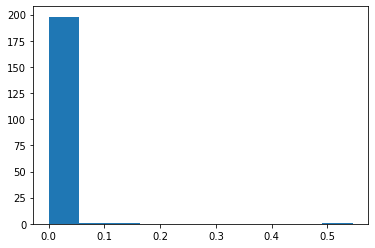

0.4797979797979798

In [15]:
diff_means = np.array(diff_means)
p_value_l = np.array(p_value_l)

plt.hist(p_value_l)
plt.show()

(diff_means[p_value_l <= 0.05]  > 0).mean()

In [254]:
import scipy.stats

import numpy as np

data = scipy.stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)

hist = np.histogram(data, bins='auto')

hist_dist = scipy.stats.rv_histogram(hist)

In [255]:
hist_dist.pdf(0)

0.25723269089696077

In [253]:
scipy.stats.norm(loc=0, scale=1.5).pdf(0)

0.2659615202676218

In [199]:
# df_sample = df.sample(10000, replace=True)

ecdf_x = ECDF(df['X'])
ecdf_y = ECDF(df['Y'])

In [200]:
up_x = []
lb_x = []

for x, y in df.values:
    u = ecdf_x(x)
    v = ecdf_y(y)
    if u < v:
        upper_bound = 1
        lower_bound = max((u + v - 1)/u, 0)
    else:
        upper_bound = v/u 
        lower_bound = max((u + v - 1)/u, 0)
    up_x.append(upper_bound)
    lb_x.append(lower_bound)
    

up_y = []
lb_y = []

for x, y in df.values:
    u = ecdf_x(x)
    v = ecdf_y(y)
    if u > v:
        upper_bound = 1
        lower_bound = max((u + v - 1)/v, 0)
    else:
        upper_bound = u/v 
        lower_bound = max((u + v - 1)/v, 0)
    up_y.append(upper_bound)
    lb_y.append(lower_bound)
        

In [201]:
up_x = np.array(up_x)
lb_x = np.array(lb_x)
up_y = np.array(up_y)
lb_y = np.array(lb_y)

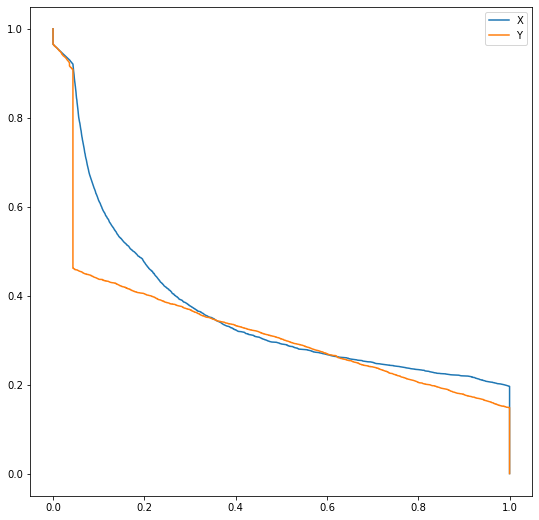

0.3644628405026079
0.3254305287699948


In [202]:
plt.figure(figsize=(9, 9))
ecdf_diff_x = ECDF(up_x - lb_x)
ecdf_diff_y = ECDF(up_y - lb_y)
plt.plot(ecdf_diff_x.x, 1 - ecdf_diff_x.y, label='X')
plt.plot(ecdf_diff_y.x, 1 - ecdf_diff_y.y, label='Y')
# plt.hist(up_x - lb_x, alpha=0.5, label='X')
# plt.hist(up_y - lb_y, alpha=0.5, label='Y')
plt.legend()
plt.show()

print(np.mean(up_x - lb_x))
print(np.mean(up_y - lb_y))

In [175]:
xs = []
ys = []

for x, y in df_sample.values:
    xs.append(ecdf_x(x))
    ys.append(ecdf_y(y))
    
xs = np.array(xs)
ys = np.array(ys)

In [36]:
ls = []

for u, v in zip(xs, ys):
    l = min(u, v) - max(u + v - 1, 0)
    ls.append(l)
    
ls = np.array(ls)

<AxesSubplot:ylabel='Count'>

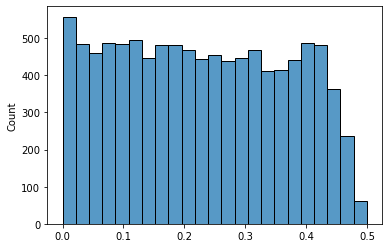

In [37]:
sns.histplot(ls)

In [48]:
df_rounded = df.round()

In [44]:
import qif

import sys
sys.path.append("..")
from mestrado.modelling import features

In [50]:
J = features.joint_distribution(df_rounded, "X", "Y")
p_x, C_xy, p_y, C_yx = features._extract_priors_and_channels(J)

In [51]:
qif.measure.bayes_vuln.mult_leakage(p_x, C_xy)

2.1575946086054953

In [52]:
qif.measure.bayes_vuln.add_leakage(p_x, C_xy)

0.44660000000000005

In [53]:
qif.measure.bayes_vuln.mult_leakage(p_y, C_yx)

2.504089219330855

In [54]:
qif.measure.bayes_vuln.add_leakage(p_y, C_yx)

0.20229999999999998

In [19]:
def mu():
    return np.random.uniform() * 10

def sd():
    return np.random.uniform() * 2

_mu = 0
_sd = 1
linear_uniform = StructuralCausalModel({
    "X": lambda n_samples: np.random.normal(_mu, _sd, size=(n_samples, )),
    "Y": lambda X, n_samples: 3 * X + np.random.uniform(-1.5, 1.5, size=(n_samples, ))
})

sin_uniform = StructuralCausalModel({
    "Y": lambda n_samples: np.random.normal(_mu, _sd, size=(n_samples, )),
    "X": lambda Y, n_samples: 3 * np.sin(Y) + np.random.uniform(-3, 3, size=(n_samples, ))
})

df = linear_uniform.sample(n_samples=10000)
# df = sin_uniform.sample(n_samples=10000)

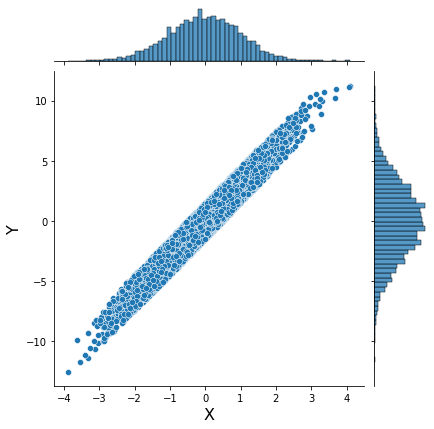

In [25]:
h = sns.jointplot(x=df['X'], y=df['Y'])
h.set_axis_labels('X', 'Y', fontsize=16)

In [22]:
ecdf_x = ECDF(df['X'])
ecdf_y = ECDF(df['Y'])

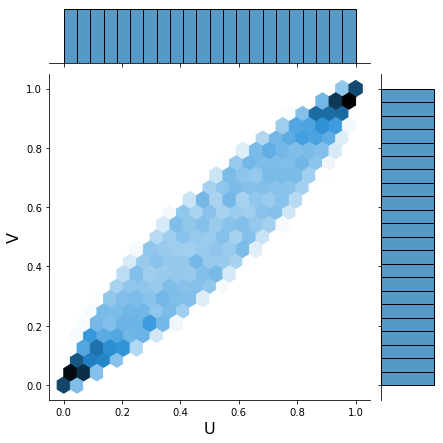

In [33]:
U = ecdf_x(df['X'])
V = ecdf_y(df['Y'])
h = sns.jointplot(x=U, y=V, kind='hex')
h.set_axis_labels('U', 'V', fontsize=16)

In [32]:
x, y = df.values[0]
u = ecdf_x(x)
v = ecdf_y(y)
print(x, y)
print(u, v)

if u < v:
    upper_bound = 1
    lower_bound = max((u + v - 1)/u, 0)
else:
    upper_bound = v/u 
    lower_bound = max((u + v - 1)/u, 0)
    
print(lower_bound, upper_bound)

hist = np.histogram(df['X'], bins='auto')
hist_dist = stats.rv_histogram(hist)
p = hist_dist.pdf(x)
print(p) 

0.2542339194095609 1.358816568945235
0.6043000000000001 0.6719
0.4570577527718024 1
0.3862404333821546


In [36]:
ub_x = []
lb_x = []
p_x = []

hist = np.histogram(df['X'], bins='auto')
hist_dist = stats.rv_histogram(hist)

for x, y in df.values:
    Fx = ecdf_x(x)
    Fy = ecdf_y(y)
    if Fx < Fy:
        upper_bound = 1
        lower_bound = max((Fx + Fy - 1)/Fx, 0)
    else:
        upper_bound = Fy/Fx 
        lower_bound = max((Fx + Fy - 1)/Fx, 0)
    ub_x.append(upper_bound)
    lb_x.append(lower_bound)
    p_x.append(hist_dist.pdf(x))
    
    
ub_y = []
lb_y = []
p_y = []

hist = np.histogram(df['Y'], bins='auto')
hist_dist = stats.rv_histogram(hist)

for x, y in df.values:
    Fx = ecdf_x(x)
    Fy = ecdf_y(y)
    if Fy < Fx:
        upper_bound = 1
        lower_bound = max((Fx + Fy - 1)/Fy, 0)
    else:
        upper_bound = Fx/Fy 
        lower_bound = max((Fx + Fy - 1)/Fy, 0)
    ub_y.append(upper_bound)
    lb_y.append(lower_bound)
    p_y.append(hist_dist.pdf(y))
    
ub_x = np.array(ub_x)
lb_x = np.array(lb_x)
ub_y = np.array(ub_y)
lb_y = np.array(lb_y)
p_x = np.array(p_x)
p_y = np.array(p_y)

leakage_y = (ub_x - lb_x) #/ (p_y + 1e-6)
leakage_x = (ub_y - lb_y) #/ (p_x + 1e-6)

diff_mean = np.mean(leakage_x - leakage_y)
stat, p_value = stats.ks_2samp(leakage_x, leakage_y, alternative='two-sided')

In [38]:
diff_mean

0.0016408176994487551

In [41]:
p_value

0.060578846945709426